# Model working on cropped image

To speed up inference, it is sometime helpful to have a model that runs on cropped images. The input of the model being smaller, the model is smaller and the inference is faster. 

When doing the inference on videos, we can crop using the previously known position of the animal.

Here we use unet-tracker to create and train a model for cropped images. We can use the data set of the original model as a starting point for training. This saves us the trouble to have to label images twice (cropped and not cropped).

In [1]:
%load_ext autoreload
%autoreload 2

# this will run the code in the setup_project.py and create a variable called `project`
%run setup_project.py


from unetTracker.trackingProject import TrackingProject
from unetTracker.dataset import UNetDataset

Project directory: /adata/models/positrack2_multiport_2023/positrack2_multiport_2023
Getting configuration from config file. Values from config file will be used.
Loading /adata/models/positrack2_multiport_2023/positrack2_multiport_2023/config.yalm
{'augmentation_HorizontalFlipProb': 0.0, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [640, 640], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'positrack2_multiport_2023', 'normalization_values': {'means': [0.39449694752693176, 0.4062608480453491, 0.4062608480453491], 'stds': [0.11578106880187988, 0.1157766655087471, 0.1157766655087471]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0)], 'objects': ['left_led', 'right_led', 'head'], 'target_radius': 6, 'unet_features': [32, 64, 128, 256]}


/home/kevin/torch/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# original project
project = TrackingProject(name="positrack2_multiport_2023",root_folder = "/adata/models/positrack2_multiport_2023/")

Project directory: /adata/models/positrack2_multiport_2023/positrack2_multiport_2023
Getting configuration from config file. Values from config file will be used.
Loading /adata/models/positrack2_multiport_2023/positrack2_multiport_2023/config.yalm
{'augmentation_HorizontalFlipProb': 0.0, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [640, 640], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'positrack2_multiport_2023', 'normalization_values': {'means': [0.39449694752693176, 0.4062608480453491, 0.4062608480453491], 'stds': [0.11578106880187988, 0.1157766655087471, 0.1157766655087471]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0)], 'objects': ['left_led', 'right_led', 'head'], 'target_radius': 6, 'unet_features': [32, 64, 128, 256]}


In [3]:
model_name = "positrack2_multiport_2023_cropped"
model_path = "/adata/models"
root_directory = "{}/{}/".format(model_path,model_name)
if not os.path.exists(root_directory):
    os.makedirs(root_directory)
else:
    print(root_directory, "already exists")
    print("If you have already created your project in the past and adjusted the configuration, you don't need to run this notebook again")

/adata/models/positrack2_multiport_2023_cropped/ already exists
If you have already created your project in the past and adjusted the configuration, you don't need to run this notebook again


In [4]:
print("original size:", project.image_size)

original size: [640, 640]


In [5]:
image_size_cropped=[200,200]

In [6]:
project_cropped = TrackingProject(name=model_name,
                          root_folder = root_directory,
                          object_list=project.object_list,
                          target_radius=project.target_radius,
                           image_size=image_size_cropped,
                          unet_features=project.unet_features)

Project directory: /adata/models/positrack2_multiport_2023_cropped/positrack2_multiport_2023_cropped


/home/kevin/repo/unetTracker/unetTracker/trackingProject.py:77: UserWarning: The directory /adata/models/positrack2_multiport_2023_cropped/positrack2_multiport_2023_cropped already exist.
 If you run save_configuration() you will overwrite the previous configuration.
  warnings.warn("The directory {} already exist.\n If you run save_configuration() you will overwrite the previous configuration.".format(self.project_dir))


In [7]:
#project_cropped.create_project_directories()
#project_cropped.save_configuration()

## Edit config.yalm if needed

You can edit the config.yalm file if you want. For instance, you might want to adjust the values for data augmentation.

In [7]:
project_cropped.load_configuration()

Loading /adata/models/positrack2_multiport_2023_cropped/positrack2_multiport_2023_cropped/config.yalm
{'augmentation_HorizontalFlipProb': 0.0, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [200, 200], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'positrack2_multiport_2023_cropped', 'normalization_values': None, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0)], 'objects': ['left_led', 'right_led', 'head'], 'target_radius': 6, 'unet_features': [32, 64, 128, 256]}


## Create the new unet-model folder with the desired frame size

## Create a cropped dataset from the non-cropped dataset.

In [34]:
print(project.image_size,project_cropped.image_size)

[640, 640] [200, 200]


In [35]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)

In [36]:
dataset_cropped = UNetDataset(image_dir=project_cropped.image_dir, mask_dir=project_cropped.mask_dir, coordinate_dir=project_cropped.coordinate_dir,
                      image_extension=project_cropped.image_extension)

Create /adata/models/positrack2_multiport_2023_cropped/positrack2_multiport_2023_cropped/dataset/images
Create /adata/models/positrack2_multiport_2023_cropped/positrack2_multiport_2023_cropped/dataset/masks
Create /adata/models/positrack2_multiport_2023_cropped/positrack2_multiport_2023_cropped/dataset/coordinates


In [37]:
len(dataset),len(dataset_cropped)

(1269, 0)

In [39]:
def generate_cropped_dataset(dataset,dataset_cropped,project,project_cropped):
    """
    Generate a cropped dataset from the non-cropped dataset
    
    
    """
    
    # loop for all labelled images in the original dataset
    for img_index in tqdm(range(len(dataset))):
        
        # load data
        img_path, mask_path, coord_path = dataset.get_image_mask_coord_file_names(img_index)
        image = cv2.imread(img_path).astype(np.float32)
        mask = np.load(mask_path).astype(np.float32)
        coordinates = np.loadtxt(coord_path)

        # get the mean of objects
        if np.all(np.isnan(coordinates)): # all invalid object
            crop_coordinate_center = np.array([np.random.uniform(low=0.0, high=image.shape[0]),np.random.uniform(low=0.0, high=image.shape[1])])
            
        else: # we have some valid data to get the mean of objects
            crop_coordinate_center = np.nanmean(coordinates,axis=0)

        
        #print("img_index:",img_index)
        #print("center",crop_coordinate_center)
            
            
        # adjust the crop coordinate center to ensure we have enough pixels in the 4 directions from the center point
        for i in range(2):
            if (crop_coordinate_center[i]+project_cropped.image_size[i]/2 > project.image_size[i]):
                crop_coordinate_center[i] = project.image_size[i]-project_cropped.image_size[i]/2
            if (crop_coordinate_center[i]-project_cropped.image_size[i]/2 < 0):
                crop_coordinate_center[i] = project_cropped.image_size[i]/2

                
        #print("center (adjusted)",crop_coordinate_center)
        # get the indices used for the crop operation
        x,X = int(crop_coordinate_center[0]-project_cropped.image_size[0]/2),int(crop_coordinate_center[0]+project_cropped.image_size[0]/2)
        y,Y = int(crop_coordinate_center[1]-project_cropped.image_size[1]/2),int(crop_coordinate_center[1]+project_cropped.image_size[1]/2)

        image_cropped = image[y:Y,x:X]
        mask_cropped = mask[y:Y,x:X]
        
        # get the coordinate of the objects
        coordinates_cropped = coordinates - np.array([[x,y]])
        
        #print("x X, y, Y:", x,X,y,Y)
        #print("coordinates:",coordinates)
        #print("coordinates_cropped:",coordinates_cropped)
        
        # make sure that we are between 0 and project_cropped.image_size
        c=coordinates_cropped
        c[np.logical_or(np.logical_or(c[:,0]<0,c[:,0]>project_cropped.image_size[0]),np.logical_or(c[:,1]<0,c[:,1]>project_cropped.image_size[1])),:] = np.nan
       
        #print("coordinates_cropped boundary applied:",coordinates_cropped)
        
        
      
        
        
        img_path, mask_path, coordinates_path = dataset_cropped.save_entry(image_cropped,mask_cropped,coordinates_cropped)

In [40]:
generate_cropped_dataset(dataset,dataset_cropped,project,project_cropped)

100%|███████████████████████████████████████| 1269/1269 [01:12<00:00, 17.54it/s]


In [41]:
len(dataset_cropped)

1269

In [51]:
image,mask,coord = dataset_cropped[5]


In [52]:
image = image.permute(1,2,0).numpy()
mask = mask.permute(1,2,0).numpy()

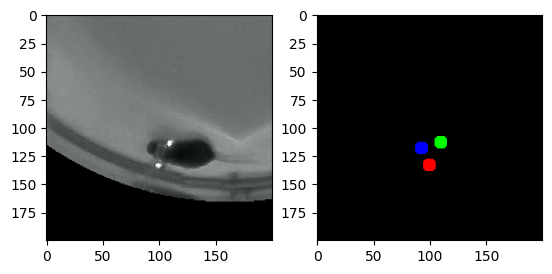

In [53]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(image/255)
axs[1].imshow(mask)


In [33]:
len(dataset),len(dataset_cropped)

(1269, 1569)